In [14]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# Loading the other modules I have in parent directories
import sys
PYTHONPATH="../"
sys.path.append(PYTHONPATH)
from dataProcessing import getDataLoaders
from models import ThreeCNN, ThreeCNN_Module 
from train import check_accuracy, train, train_ThreeCNN
from plottingFcts import trainingMetrics, sigBkgEff, plotROC

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
loader_train, loader_val, loader_test = getDataLoaders(batch_size=256)

torch.Size([900000])


Let's try to set up a basic model and train it for one epoch, to make sure the code works.

In [6]:
# establish network dimensions 
"""
layer0_params = [1, 3, 3, 1, 1]
layer0_reduce = [1, 3, 93, 1, 1]

layer1_params = [1, 3, 3, 1, 1]
layer1_reduce = [1, 12, 9, 1, 1]

layer2_params = [1, 3, 3, 1, 1]
layer2_reduce = [1, 12, 3, 1, 1]

fc_params = [54, 150, 100, 50, 3, 0.5]

"""

test_one = ThreeCNN(layer0_params, layer0_reduce, layer1_params, layer1_reduce, layer2_params, layer2_reduce, fc_params)

In [17]:
# a check that the model parameters are correct 
print(test_one.layer0_params_all)
# for some reason, duplicate values (1's) are not being appended--why? 

[1, 3, 3, 1, 1, 1, 3, 93, 1, 1]


In [18]:
# construct layer models, FC model 
layer_models = test_one.forward_preprocess() 
fc_model = test_one.forward_fc()

In [19]:
# unpack layer models 
layer0_model = layer_models[0]
layer1_model = layer_models[1]
layer2_model = layer_models[2] 

In [27]:
# optimizer 
optimizer = optim.Adam(
    [{'params' : layer0_model.parameters()},
    {'params' : layer1_model.parameters()},
    {'params' : layer2_model.parameters()},
    {'params' : fc_model.parameters()}]
)
# train the network for one epoch 
train_ThreeCNN(loader_train, loader_val, layer0_model, layer1_model, layer2_model, fc_model, optimizer)

Iteration 0, loss = 0.3059
Iteration 100, loss = 0.0340
Iteration 200, loss = 0.0108
Iteration 300, loss = 0.0034
Iteration 400, loss = 0.0028
Iteration 500, loss = 0.0018
Iteration 600, loss = 0.0012
Iteration 700, loss = 0.0012


{'acc': [],
 'loss': [<function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor.item>,
  <function Tensor

In [7]:
# establish network dimensions 
layer0_params = [1, 3, 3, 1, 1]
layer0_reduce = [1, 3, 93, 1, 1]

layer1_params = [1, 3, 3, 1, 1]
layer1_reduce = [1, 12, 9, 1, 1]

layer2_params = [1, 3, 3, 1, 1]
layer2_reduce = [1, 12, 3, 1, 1]

fc_params = [54, 150, 100, 50, 3, 0.5]

In [8]:
# trying out the module API network 
module_test = ThreeCNN_Module(layer0_params, layer0_reduce, layer1_params, layer1_reduce, layer2_params, layer2_reduce, fc_params)

optimizer = optim.Adam(module_test.parameters())

# train the network for one epoch 
hist = train(loader_train, loader_val, module_test, optimizer)

Iteration 0, loss = 1.0621
Got 16088 / 30000 correct (53.63)

Iteration 100, loss = 0.3263
Got 29994 / 30000 correct (99.98)

Iteration 200, loss = 0.1458
Got 30000 / 30000 correct (100.00)

Iteration 300, loss = 0.0645
Got 30000 / 30000 correct (100.00)

Iteration 400, loss = 0.0674
Got 30000 / 30000 correct (100.00)

Iteration 500, loss = 0.0333
Got 30000 / 30000 correct (100.00)

Iteration 600, loss = 0.0225
Got 30000 / 30000 correct (100.00)

Iteration 700, loss = 0.0236
Got 30000 / 30000 correct (100.00)

Got 180000 / 180000 correct (100.00)
Got 30000 / 30000 correct (100.00)


(30000,)
0.1716579 11.927319
Flavor is: $\gamma$
Max is 11.927319
Min is 0.171658


/home/shared/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:838: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Flavor is: $\pi^+$
Empty Discriminant
Flavor is: $e^+$
Empty Discriminant


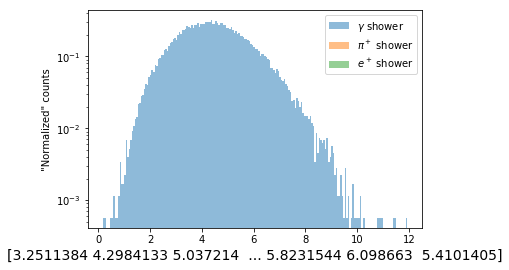

/home/shared/anaconda3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


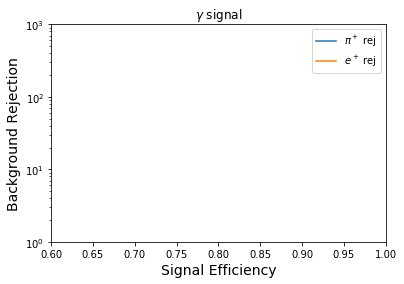

(30000,)
-11.6559725 -1.6071804
Flavor is: $\gamma$
Max is -1.607180
Min is -11.655972
Flavor is: $\pi^+$
Empty Discriminant
Flavor is: $e^+$
Empty Discriminant


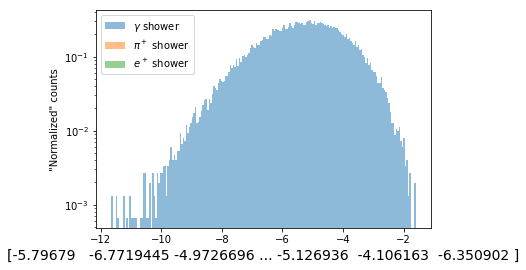

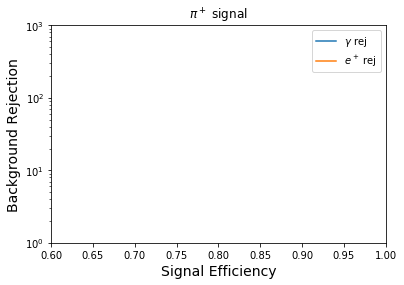

(30000,)
-12.233334 -1.4494544
Flavor is: $\gamma$
Max is -1.449454
Min is -12.233334
Flavor is: $\pi^+$
Empty Discriminant
Flavor is: $e^+$
Empty Discriminant


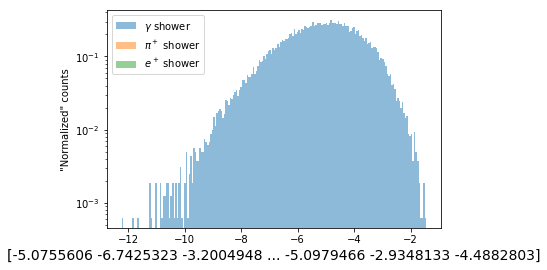

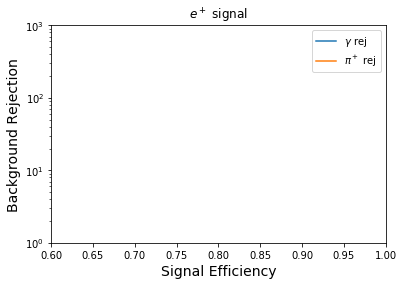

In [15]:
# get ROC curves for model 
for node in range(3):
    g_eff, pi_eff, e_eff = sigBkgEff(module_test, loader_val, node)
    
    # Plot the ROC curve using node as the signal and the other two as the bkg
    if node == 0:
        plotROC([g_eff, g_eff], [pi_eff, e_eff], ['$\pi^+$ rej', '$e^+$ rej'], title='$\gamma$ signal')
    if node == 1:
        plotROC([pi_eff, pi_eff], [g_eff, e_eff], ['$\gamma$ rej', '$e^+$ rej'], title='$\pi^+$ signal')
    elif node == 2:
        plotROC([e_eff, e_eff], [g_eff, pi_eff], ['$\gamma$ rej', '$\pi^+$ rej'], title='$e^+$ signal')